In [ ]:
using Plots
include("coevolution_network_base.jl")
using .CoevolutionNetworkBase
using LaTeXStrings

  0.070931 seconds (2.40 k allocations: 2.673 MiB)


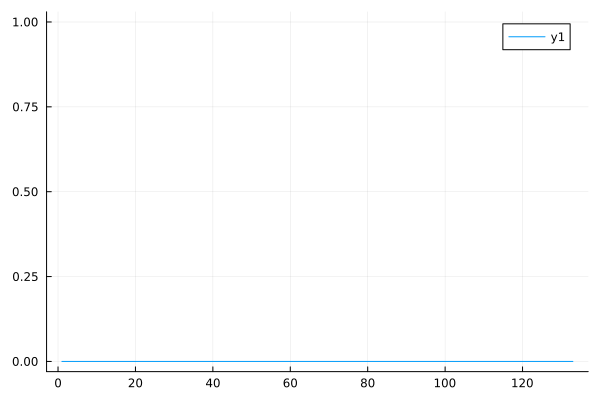

In [147]:
# Parameters
L = 40.0
dx = 0.3
x = -L/2:dx:L/2-dx
r = 3.0
M = 15
beta = 6.0
alpha = 1.0
gamma = 0.0
D = 0.01
Nh = 3 * 10^6

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[68] = 100/dx
viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))

# Create Population instances
population1 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density)
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density)

# Create Network instance
migration_matrix = [0.0 0.1; 0.1 0.0] # Define an appropriate migration matrix
network = Network([population1, population2], migration_matrix)

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
# duration = 80.0 # Define an appropriate simulation duration
duration = 20.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration)

# Run the simulation
@time run_simulation!(simulation)

plot(population1.viral_density)

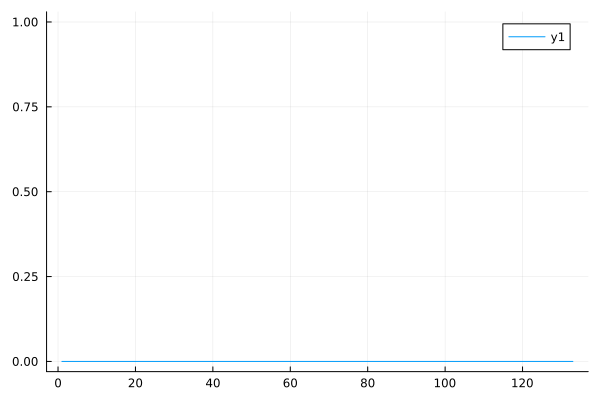

In [4]:
plot(population1.viral_density)

In [5]:
for j = 1:100
    single_step_evolve!(population1,dt)
end

In [ ]:
x = LinRange(0.0,1.0,100)

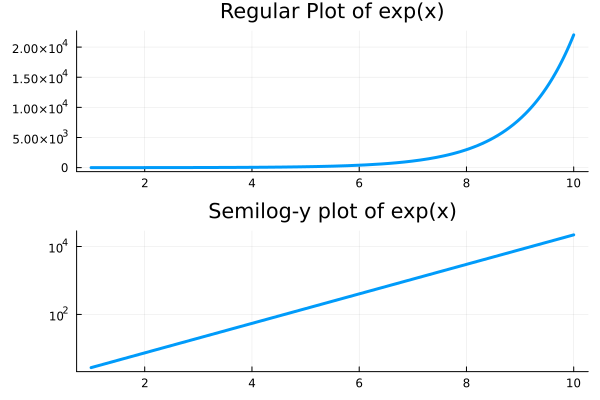

In [7]:
f(x) = exp(x)
p1 = plot(f, 1, 10, lw=3,
            title="Regular Plot of exp(x)",
            label=false)

p2 = plot(f, 1, 10, 
            yscale=:log10, lw=3,
            title="Semilog-y plot of exp(x)",
            label=false)

plot(p1,p2,layout=(2,1))